# Prerequisite Steps:

In [185]:
#Load libraries
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split  #importing the train_test_split function from the sklearn library
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


In [191]:
#Load the test and train datasets 
train = pd.read_excel('train.xlsx')  
test = pd.read_excel('test.xlsx')  

values_train = train.values
values_test = test.values

train_x, train_y = values_train[:, :-1], values_train[:, -1]  
test_x, test_y = values_test[:, :-1], values_test[:, -1]  



Wall time: 2.22 s


# PART ONE: Evaluation of Classification Models

### Logistic Regression Classification:

Logistic Regression Accuracy:  0.841
Wall time: 4.45 s


C:\Users\dsana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(91.68, 0.5, 'Predicted')

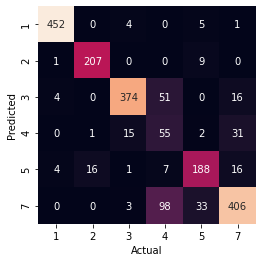

In [199]:
%%time
# Generate a Logistic  regression model 
from sklearn import preprocessing


model = LogisticRegression(penalty="l2",C=1.0,fit_intercept=True,max_iter=3000)  
model.fit(train_x, train_y)
y_hat = model.predict(test_x)

#print(y_hat)
#print(test_y)

# Print Accuracy
score = accuracy_score(test_y, y_hat)
print("Logistic Regression Accuracy: ", score)

# Generate confusion matrix and heat map for Logistic Regression
mat = confusion_matrix(test_y, y_hat)  
x_axis_labels = [1,2,3,4,5,7] # labels for x-axis
y_axis_labels = [1,2,3,4,5,7] # labels for y-axis
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=x_axis_labels, yticklabels=y_axis_labels
    )
plt.xlabel('Actual')
plt.ylabel('Predicted');

In [154]:
print(classification_report(test_y,y_hat))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       461
           2       0.95      0.92      0.94       224
           3       0.84      0.94      0.89       397
           4       0.53      0.26      0.35       211
           5       0.81      0.79      0.80       237
           7       0.75      0.86      0.80       470

    accuracy                           0.84      2000
   macro avg       0.81      0.79      0.79      2000
weighted avg       0.83      0.84      0.83      2000



### SVM Classification:

Linear SVM Accuracy:  0.763
Wall time: 219 ms


C:\Users\dsana\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Text(91.68, 0.5, 'Predicted')

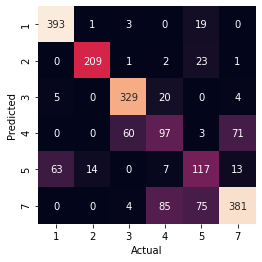

In [188]:
%%time
# Linear Kernal

model_lin = svm.SVC(kernel='linear',degree=64,C=1,max_iter=500)
model_lin.fit(train_x,train_y) 

#evaluate model accuracy
y_hat_lin = model_lin.predict(test_x)
score = accuracy_score(test_y, y_hat_lin)
print("Linear SVM Accuracy: ", score)

#Build a confusion matrix and visualize as a heat map
mat = confusion_matrix(test_y, y_hat_lin)  
x_axis_labels = [1,2,3,4,5,7] # labels for x-axis
y_axis_labels = [1,2,3,4,5,7] # labels for y-axis
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=x_axis_labels, yticklabels=y_axis_labels
    )
plt.xlabel('Actual')
plt.ylabel('Predicted');

In [156]:
print(classification_report(test_y,y_hat_lin))

              precision    recall  f1-score   support

           1       0.94      0.85      0.90       461
           2       0.89      0.93      0.91       224
           3       0.92      0.83      0.87       397
           4       0.42      0.46      0.44       211
           5       0.55      0.49      0.52       237
           7       0.70      0.81      0.75       470

    accuracy                           0.76      2000
   macro avg       0.74      0.73      0.73      2000
weighted avg       0.77      0.76      0.77      2000



Polynomial SVM Accuracy:  0.8755
Wall time: 350 ms


C:\Users\dsana\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Text(91.68, 0.5, 'Predicted')

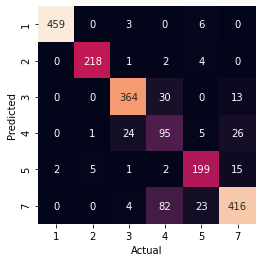

In [197]:
%%time
# Polynomial Kernal

model_poly = svm.SVC(kernel='poly',degree=2,C=1,max_iter=1000)
model_poly.fit(train_x,train_y) 

#evaluate model accuracy
y_hat_poly = model_poly.predict(test_x)
score = accuracy_score(test_y, y_hat_poly)
print("Polynomial SVM Accuracy: ", score)

#Build a confusion matrix and visualize as a heat map
mat = confusion_matrix(test_y, y_hat_poly)  
x_axis_labels = [1,2,3,4,5,7] # labels for x-axis
y_axis_labels = [1,2,3,4,5,7] # labels for y-axis
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=x_axis_labels, yticklabels=y_axis_labels
    )
plt.xlabel('Actual')
plt.ylabel('Predicted');

In [158]:
print(classification_report(test_y,y_hat_poly))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.97      0.97      0.97       224
           3       0.89      0.92      0.91       397
           4       0.63      0.45      0.52       211
           5       0.89      0.84      0.86       237
           7       0.79      0.89      0.84       470

    accuracy                           0.88      2000
   macro avg       0.86      0.84      0.85      2000
weighted avg       0.87      0.88      0.87      2000



RFB SVM Accuracy:  0.8755
Wall time: 394 ms


Text(91.68, 0.5, 'Predicted')

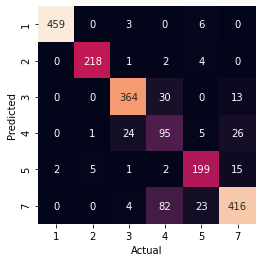

In [198]:
%%time
# RBF Kernal

model_rbf = svm.SVC(kernel='rbf',degree=2,C=1,max_iter=1000)
model_rbf.fit(train_x,train_y) 

#evaluate model accuracy
y_hat_rbf = model_poly.predict(test_x)
score = accuracy_score(test_y, y_hat_rbf)
print("RFB SVM Accuracy: ", score)

mat_rbf = confusion_matrix(test_y, y_hat_rbf)
x_axis_labels = [1,2,3,4,5,7] # labels for x-axis
y_axis_labels = [1,2,3,4,5,7] # labels for y-axis
sns.heatmap(mat_rbf.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=x_axis_labels, yticklabels=y_axis_labels
    )
plt.xlabel('Actual')
plt.ylabel('Predicted');

In [160]:
print(classification_report(test_y,y_hat_rbf))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.97      0.97      0.97       224
           3       0.89      0.92      0.91       397
           4       0.63      0.45      0.52       211
           5       0.89      0.84      0.86       237
           7       0.79      0.89      0.84       470

    accuracy                           0.88      2000
   macro avg       0.86      0.84      0.85      2000
weighted avg       0.87      0.88      0.87      2000



### Naive Bayes Classification:

Naive Bayes Accuracy:  0.7685
Wall time: 48.9 ms


Text(91.68, 0.5, 'Predicted')

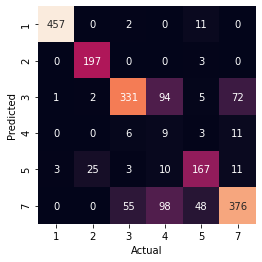

In [192]:
%%time
# Generate a Naive Bayes model 

model=MultinomialNB()

model.fit(train_x, train_y)
labels = model.predict(test_x)

#predict the accuracy of the model on test data
score = accuracy_score(test_y, labels)
print("Naive Bayes Accuracy: ", score)

#build a confusion matrix to visualize the performance of the model using seaborn
mat = confusion_matrix(test_y, labels)
x_axis_labels = [1,2,3,4,5,7] 
y_axis_labels = [1,2,3,4,5,7] 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=x_axis_labels, yticklabels=y_axis_labels
    )
plt.xlabel('Actual')
plt.ylabel('Predicted');

In [162]:
#Print the Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_y,labels))


              precision    recall  f1-score   support

           1       0.97      0.99      0.98       461
           2       0.98      0.88      0.93       224
           3       0.66      0.83      0.73       397
           4       0.31      0.04      0.08       211
           5       0.76      0.70      0.73       237
           7       0.65      0.80      0.72       470

    accuracy                           0.77      2000
   macro avg       0.72      0.71      0.70      2000
weighted avg       0.74      0.77      0.74      2000



### K-nearest Neighbours Classification:

Wall time: 11.4 s


Text(0, 0.5, 'Accuracy')

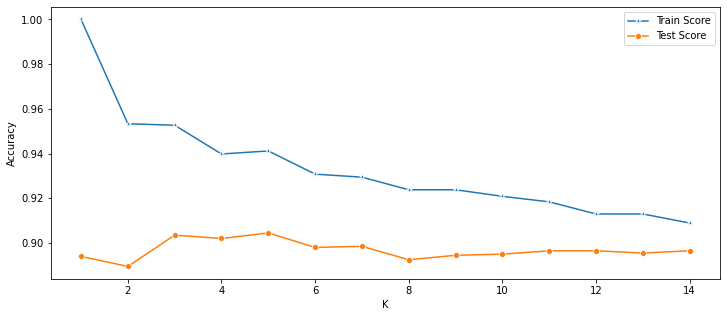

In [190]:
%%time

# manually try different k values to get the optimal value. 

test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(train_x,train_y)
    pred_y_train=knn.predict(train_x)
    train_accuracy=accuracy_score(pred_y_train,train_y)
    train_scores.append(train_accuracy)
    pred_y_test=knn.predict(test_x)
    test_accuracy=accuracy_score(pred_y_test,test_y)
    test_scores.append(test_accuracy)

plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')
plt.xlabel("K")
plt.ylabel("Accuracy")



K value used: 4
K-nearest Neighbours Accuracy:  0.902
Wall time: 339 ms


Text(91.68, 0.5, 'Predicted')

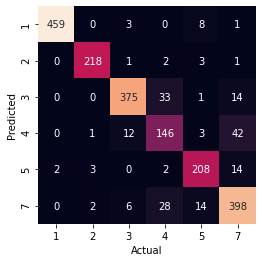

In [194]:
%%time

# Use highest accuracy K for final K-nearest model
print("K value used:", test_scores.index(max(test_scores)))
knn1 = KNeighborsClassifier(test_scores.index(max(test_scores)))
knn1.fit(train_x,train_y)
y_pred = knn1.predict(test_x)
score = accuracy_score(y_pred, test_y)
print("K-nearest Neighbours Accuracy: ", score)

#build a confusion matrix to visualize the performance of the model using seaborn
mat_knn = confusion_matrix(test_y, y_pred)
x_axis_labels = [1,2,3,4,5,7] # labels for x-axis
y_axis_labels = [1,2,3,4,5,7] # labels for y-axis
sns.heatmap(mat_knn.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=x_axis_labels, yticklabels=y_axis_labels
    )
plt.xlabel('Actual')
plt.ylabel('Predicted');

In [165]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98       461
           2       0.97      0.97      0.97       224
           3       0.89      0.94      0.91       397
           4       0.72      0.69      0.70       211
           5       0.91      0.88      0.89       237
           7       0.89      0.85      0.87       470

    accuracy                           0.90      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.90      0.90      0.90      2000



# PART TWO: Analysis of SVM and K-NN Models:

### SVM (rbf) model further analysis:

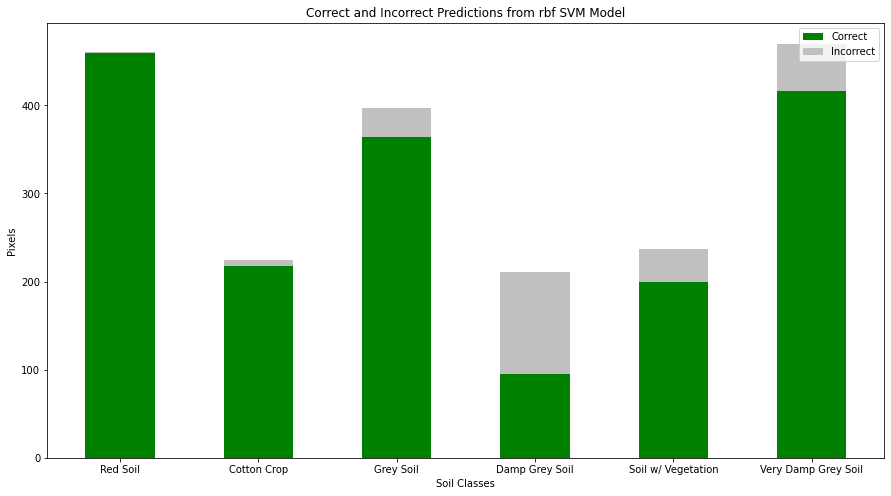

In [195]:
from matplotlib.pyplot import figure

# Plot bar chart of predicted soil classes
predict_1_correct = mat_rbf[0,0]
predict_1_incorrect = sum(mat_rbf[0,1:6])
predict_2_correct = mat_rbf[1,1]
predict_2_incorrect = mat_rbf[1,0]+ sum(mat_rbf[1,2:6])
predict_3_correct = mat_rbf[2,2]
predict_3_incorrect = sum(mat_rbf[2,0:2]) + sum(mat_rbf[2,3:6])
predict_4_correct = mat_rbf[3,3]
predict_4_incorrect = sum(mat_rbf[3,0:3]) + sum(mat_rbf[3,4:6])
predict_5_correct = mat_rbf[4,4]
predict_5_incorrect = mat_rbf[4,5]+ sum(mat_rbf[4,0:4])
predict_7_correct = mat_rbf[5,5]
predict_7_incorrect = sum(mat_rbf[5,0:5])

predict_correct = [predict_1_correct, predict_2_correct, predict_3_correct, predict_4_correct, predict_5_correct, predict_7_correct]
predict_incorrect= [predict_1_incorrect, predict_2_incorrect, predict_3_incorrect, predict_4_incorrect, predict_5_incorrect, predict_7_incorrect]
#print(predict_incorrect)
#print(predict_correct)

countries = ['Red Soil', 'Cotton Crop', 'Grey Soil', 'Damp Grey Soil', 'Soil w/ Vegetation', 'Very Damp Grey Soil']
ind = [1,2,3,4,5,6]
plt.figure(figsize=(15,8))

plt.bar(ind, predict_correct, width=0.5, label='Correct', color='green')
plt.bar(ind, predict_incorrect, width=0.5, label='Incorrect', color='silver', bottom=predict_correct)

plt.xticks(ind, countries)
plt.ylabel("Pixels")
plt.xlabel("Soil Classes")
plt.legend(loc="upper right")
plt.title("Correct and Incorrect Predictions from rbf SVM Model")
plt.show()

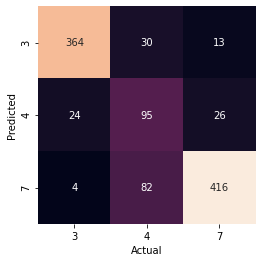

In [167]:
# Grey Soil Analysis For Rbf Model
grey_rbf = np.delete(np.delete(mat_rbf, [0,1,4], 0), [0,1,4], 1)

x_axis_labels = [3,4,7] # labels for x-axis
y_axis_labels = [3,4,7] # labels for y-axis
sns.heatmap(grey_rbf.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=x_axis_labels, yticklabels=y_axis_labels
    )
plt.xlabel('Actual')
plt.ylabel('Predicted');

### K-NN model further analysis:

[[459   0   0   0   2   0]
 [  0 218   0   1   3   2]
 [  3   1 375  12   0   6]
 [  0   2  33 146   2  28]
 [  8   3   1   3 208  14]
 [  1   1  14  42  14 398]]


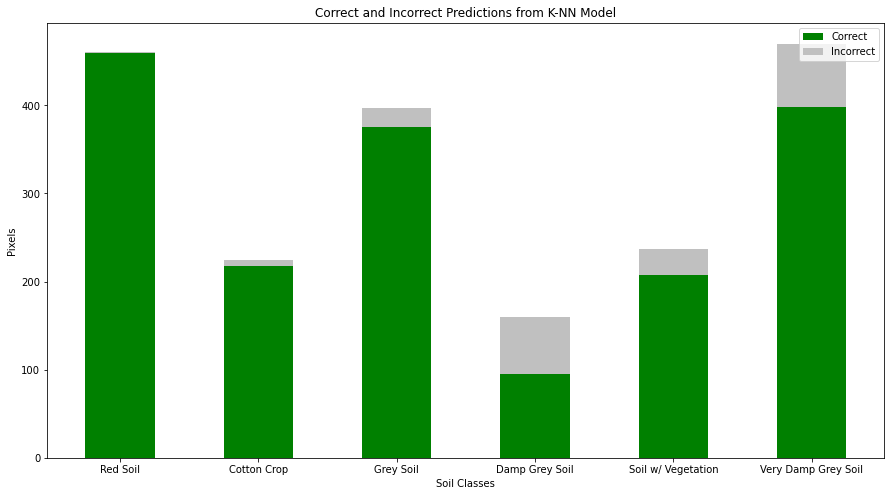

In [168]:
# Plot bar chart of predicted soil classes
predict_1_correct = mat_knn[0,0]
predict_1_incorrect = sum(mat_rbf[0,1:6])
predict_2_correct = mat_knn[1,1]
predict_2_incorrect = mat_knn[1,0]+ sum(mat_knn[1,2:6])
predict_3_correct = mat_knn[2,2]
predict_3_incorrect = sum(mat_knn[2,0:2]) + sum(mat_knn[2,3:6])
predict_4_correct = mat_rbf[3,3]
predict_4_incorrect = sum(mat_knn[3,0:3]) + sum(mat_knn[3,4:6])
predict_5_correct = mat_knn[4,4]
predict_5_incorrect = mat_knn[4,5]+ sum(mat_knn[4,0:4])
predict_7_correct = mat_knn[5,5]
predict_7_incorrect = sum(mat_knn[5,0:5])

predict_correct = [predict_1_correct, predict_2_correct, predict_3_correct, predict_4_correct, predict_5_correct, predict_7_correct]
predict_incorrect= [predict_1_incorrect, predict_2_incorrect, predict_3_incorrect, predict_4_incorrect, predict_5_incorrect, predict_7_incorrect]
#print(predict_incorrect)
#print(predict_correct)

countries = ['Red Soil', 'Cotton Crop', 'Grey Soil', 'Damp Grey Soil', 'Soil w/ Vegetation', 'Very Damp Grey Soil']
ind = [1,2,3,4,5,6]
plt.figure(figsize=(15,8))

plt.bar(ind, predict_correct, width=0.5, label='Correct', color='green')
plt.bar(ind, predict_incorrect, width=0.5, label='Incorrect', color='silver', bottom=predict_correct)

plt.xticks(ind, countries)
plt.ylabel("Pixels")
plt.xlabel("Soil Classes")
plt.legend(loc="upper right")
plt.title("Correct and Incorrect Predictions from K-NN Model")
plt.show()

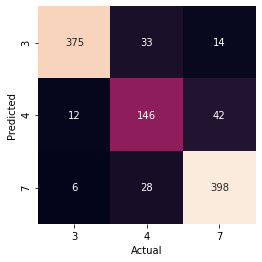

In [169]:
# Grey Soil Analysis For K-NN Model
grey_knn = np.delete(np.delete(mat_knn, [0,1,4], 0), [0,1,4], 1)

x_axis_labels = [3,4,7] # labels for x-axis
y_axis_labels = [3,4,7] # labels for y-axis
sns.heatmap(grey_knn.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=x_axis_labels, yticklabels=y_axis_labels
    )
plt.xlabel('Actual')
plt.ylabel('Predicted');